In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv("train_ctrUa4K.csv")
test_df = pd.read_csv("test_lAUu6dG.csv")

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [46]:
train_df.info()
print ('----------------------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Col

In [5]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_df.groupby(['Gender','Loan_Status'])['Loan_Status'].count()

Gender  Loan_Status
Female  N               37
        Y               75
Male    N              150
        Y              339
Name: Loan_Status, dtype: int64

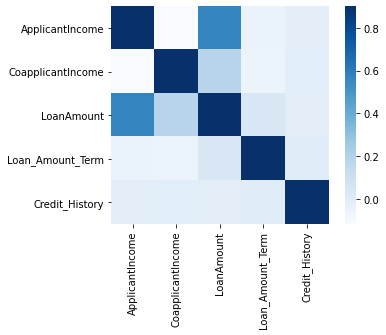

In [7]:
corr = train_df.corr()
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

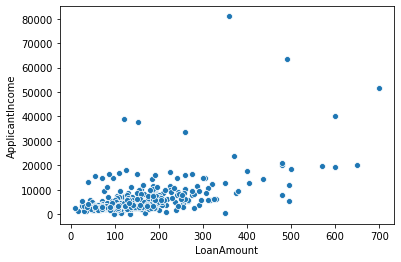

In [8]:
sns.scatterplot(x="LoanAmount", y="ApplicantIncome", data=train_df)

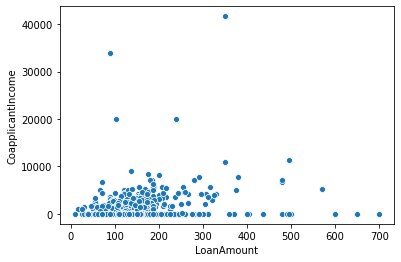

In [9]:
sns.scatterplot(x="LoanAmount", y="CoapplicantIncome", data=train_df)

In [10]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]

,Train,Test
Gender,13,11.0
Married,3,0.0
Dependents,15,10.0
Self_Employed,32,23.0
LoanAmount,22,5.0
Loan_Amount_Term,14,6.0
Credit_History,50,29.0


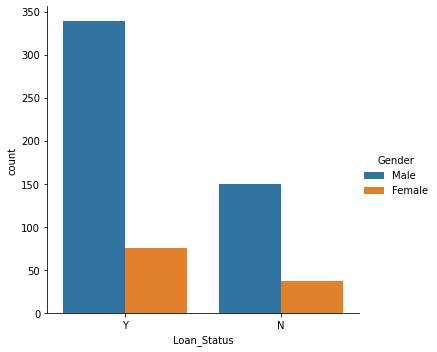

In [11]:
sns.catplot(x="Loan_Status", kind="count", hue = "Gender", data=train_df);

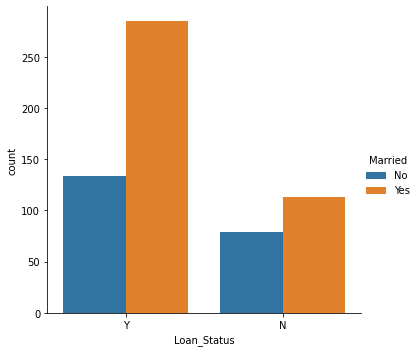

In [12]:
sns.catplot(x="Loan_Status", kind="count", hue = "Married", data=train_df);

In [13]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [16]:
y = train_df["Loan_Status"]
train_df=train_df.iloc[:,0:12]

In [19]:
df=pd.concat([train_df,test_df],axis=0)

In [21]:
df.shape

(981, 12)

In [22]:
df['Married'] = df['Married'].replace({'No': 0, 'Yes': 1})
df['Self_Employed'] = df['Self_Employed'].replace({'No': 0, 'Yes': 1})

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,0.0,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban


In [26]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [28]:
X=df.iloc[:,0:12]

In [34]:
X_cont=X.iloc[:,[6,7,8,9]]
X_cat=X.iloc[:,[0,1,2,3,4,5,10,11]]

In [35]:
X_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,LP001002,Male,0.0,0,Graduate,0.0,1.0,Urban
1,LP001003,Male,1.0,1,Graduate,0.0,1.0,Rural
2,LP001005,Male,1.0,0,Graduate,1.0,1.0,Urban
3,LP001006,Male,1.0,0,Not Graduate,0.0,1.0,Urban
4,LP001008,Male,0.0,0,Graduate,0.0,1.0,Urban


In [36]:
X_cont.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,120.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [40]:
from sklearn.preprocessing import LabelEncoder
label_x = LabelEncoder()

In [47]:
X_cat.iloc[:,0]=label_x.fit_transform(X_cat.iloc[:,0])
X_cat.iloc[:,1]=label_x.fit_transform(X_cat.iloc[:,1])
X_cat.iloc[:,3]=label_x.fit_transform(X_cat.iloc[:,3])
X_cat.iloc[:,4]=label_x.fit_transform(X_cat.iloc[:,4])
X_cat.iloc[:,7]=label_x.fit_transform(X_cat.iloc[:,7])

C:\Users\indra\anaconda3\envs\Python\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
X_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,0,1,0.0,0,0,0.0,1.0,2
1,1,1,1.0,1,0,0.0,1.0,0
2,2,1,1.0,0,0,1.0,1.0,2
3,3,1,1.0,0,1,0.0,1.0,2
4,4,1,0.0,0,0,0.0,1.0,2


In [43]:
x=np.zeros((981,12))

In [49]:
x[:,0:4]=X_cont
x[:,4:12]=X_cat

In [50]:
x_train=x[0:614,:]
x_test=x[614:,:]

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_train,y,test_size=0.3,random_state=42)

In [71]:
"""
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
"""
#reduced accuracy by 5%

'\nfrom imblearn.under_sampling import RandomUnderSampler\nrus = RandomUnderSampler(random_state=42)\nX_res, y_res = rus.fit_resample(X_train, y_train)\n'

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 350, random_state = 0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
y_pred=rfc.predict(X_test)

In [74]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [75]:
accuracy_score(y_test, y_pred)

0.7837837837837838

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.86      0.46      0.60        65
           Y       0.77      0.96      0.85       120

    accuracy                           0.78       185
   macro avg       0.81      0.71      0.73       185
weighted avg       0.80      0.78      0.76       185



In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 350, random_state = 0)
rfc.fit(x_train,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [78]:
yt_pred=rfc.predict(x_test)

In [81]:
submission = pd.DataFrame({ "Loan_ID": test_df["Loan_ID"],
                            "Loan_Status": yt_pred })
submission.to_csv('submission.csv', index=False)